<a href="https://colab.research.google.com/github/projectsforstudents2022/Predict_Fuel_Efficiency/blob/main/Predict_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from sklearn.metrics import mean_squared_error, r2_score 
%matplotlib inline

In [2]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

df=pd.read_csv(r'/content/drive/MyDrive/Projects/Predict_Fuel_Efficiency/Auto.csv',na_values='?')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [9]:
df.drop(['name'],axis=1,inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


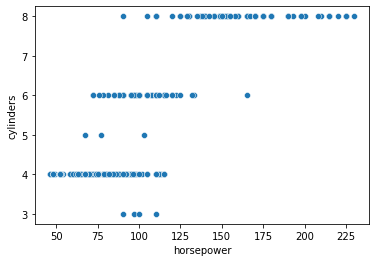

In [10]:
sns.scatterplot(df['horsepower'], df['cylinders'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


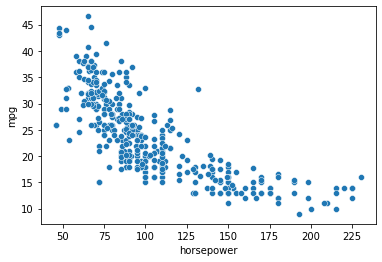

In [11]:
sns.scatterplot(df['horsepower'], df['mpg'])
plt.show()

# Splitting the data into Training and Test

In [12]:
X=df.drop("mpg",axis=1)
Y=df['mpg']

In [13]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [14]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [17]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
258,6,231.0,105.0,3380,15.8,78,1
212,8,350.0,180.0,4380,12.1,76,1
346,4,97.0,67.0,2065,17.8,81,3
71,3,70.0,97.0,2330,13.5,72,3
191,6,225.0,100.0,3233,15.4,76,1


In [18]:
Y_train.head()

258    20.6
212    16.5
346    32.3
71     19.0
191    22.0
Name: mpg, dtype: float64

In [19]:
X_test.head()


,cylinders,displacement,horsepower,weight,acceleration,year,origin
39,8,400.0,175.0,4464,11.5,71,1
285,8,305.0,130.0,3840,15.4,79,1
164,6,231.0,110.0,3039,15.0,75,1
220,4,85.0,70.0,1945,16.8,77,3
163,6,225.0,95.0,3785,19.0,75,1


Standard scalar

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [22]:
X_train_std

array([[ 0.37363496,  0.42153535,  0.06049357, ...,  0.03181711,
         0.51946626, -0.7593761 ],
       [ 1.55037035,  1.57170955,  1.98784692, ..., -1.2688355 ,
        -0.02797126, -0.7593761 ],
       [-0.80310043, -0.87361879, -0.91603212, ...,  0.73487257,
         1.34062255,  1.70297954],
       ...,
       [ 0.37363496, -0.13905375,  0.18898379, ..., -1.09307164,
         1.34062255, -0.7593761 ],
       [ 1.55037035,  1.47505625,  1.47388602, ..., -2.71009921,
        -1.67028383, -0.7593761 ],
       [-0.80310043, -0.76730016, -0.71044777, ...,  0.38334484,
         1.34062255,  1.70297954]])

In [23]:
X_test_std

array([[ 1.55037035,  2.05497602,  1.85935669,  1.80884975, -1.47975214,
        -1.39656507, -0.7593761 ],
       [ 1.55037035,  1.13676973,  0.70294469,  1.07040588, -0.10879398,
         0.79318502, -0.7593761 ],
       [ 0.37363496,  0.42153535,  0.18898379,  0.12249955, -0.24940508,
        -0.30169002, -0.7593761 ],
       [-0.80310043, -0.98960274, -0.83893799, -1.17214404,  0.38334484,
         0.2457475 ,  1.70297954],
       [ 0.37363496,  0.36354337, -0.19648687,  1.00531868,  1.15670585,
        -0.30169002, -0.7593761 ],
       [ 0.37363496,  0.60517661, -0.63335363,  0.75562051,  1.85976132,
        -0.02797126, -0.7593761 ],
       [-0.80310043, -1.11525202, -0.86463603, -1.56503405,  0.80517812,
        -1.39656507,  1.70297954],
       [ 0.37363496,  0.36354337, -0.06799665,  0.82189111,  0.6997198 ,
         0.2457475 , -0.7593761 ],
       [ 0.37363496,  0.43120068, -0.3249771 ,  0.32486158,  0.52395593,
         0.51946626, -0.7593761 ],
       [-0.80310043, -0.7189

In [24]:
len(X_train.keys())

7

In [25]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [26]:
# Initialising the ANN
model= Sequential()

# Adding the input layer
model.add(Dense(units=64,activation='relu',input_shape=[7]))
# model.add(Dense(units=64,activation='relu',input_shape=[len(X_train.keys())]))

# Adding the second hidden layer
model.add(Dense(units=64,activation='relu'))

# Adding the 3rd hidden layer
model.add(Dense(units=64,activation='relu'))

# Adding the output layer
model.add(Dense(units=1))

Compiling the ANN

In [27]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_squared_error','mean_absolute_error'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [29]:
model.fit(X_train_std,Y_train,batch_size=10,epochs=1000)

Epoch 1/1000
28/28 [==============================] - 1s 4ms/step - loss: 594.0225 - mean_squared_error: 594.0225 - mean_absolute_error: 22.9962
Epoch 2/1000
28/28 [==============================] - 0s 5ms/step - loss: 382.5587 - mean_squared_error: 382.5587 - mean_absolute_error: 17.6545
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 63.3379 - mean_squared_error: 63.3379 - mean_absolute_error: 6.6439
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 26.1366 - mean_squared_error: 26.1366 - mean_absolute_error: 4.1589
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 19.6642 - mean_squared_error: 19.6642 - mean_absolute_error: 3.4878
Epoch 6/1000
28/28 [==============================] - 0s 4ms/step - loss: 16.1429 - mean_squared_error: 16.1429 - mean_absolute_error: 3.0779
Epoch 7/1000
28/28 [==============================] - 0s 4ms/step - loss: 14.2598 - mean_squared_error: 14.2598 - mean_absolute_error: 2.8205


In [30]:
mae=model.evaluate(X_train_std,Y_train)

9/9 [==============================] - 0s 3ms/step - loss: 0.8919 - mean_squared_error: 0.8919 - mean_absolute_error: 0.5801


In [31]:
model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 13.2836 - mean_squared_error: 13.2836 - mean_absolute_error: 2.5532


[13.283598899841309, 13.283598899841309, 2.55316424369812]

In [32]:
prediction=model.predict(X_test_std)

In [33]:
# Actual data
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
181    33.0
107    18.0
42     12.0
31     25.0
33     19.0
Name: mpg, Length: 118, dtype: float64

In [34]:
prediction

array([[13.86622  ],
       [18.170639 ],
       [20.89658  ],
       [32.180847 ],
       [19.105402 ],
       [16.693014 ],
       [32.29665  ],
       [19.999376 ],
       [20.646706 ],
       [25.217293 ],
       [24.392801 ],
       [24.848866 ],
       [30.197208 ],
       [39.185986 ],
       [22.86076  ],
       [24.460575 ],
       [13.518581 ],
       [21.80251  ],
       [11.545165 ],
       [15.317729 ],
       [28.726658 ],
       [20.85072  ],
       [18.452887 ],
       [13.713975 ],
       [31.056576 ],
       [29.775257 ],
       [19.662575 ],
       [12.982033 ],
       [22.437517 ],
       [13.776445 ],
       [33.607693 ],
       [36.241623 ],
       [29.137505 ],
       [28.47256  ],
       [32.293713 ],
       [21.738876 ],
       [19.623898 ],
       [17.476078 ],
       [12.270117 ],
       [30.921698 ],
       [31.775135 ],
       [21.12939  ],
       [14.6708975],
       [11.073584 ],
       [12.454436 ],
       [25.664906 ],
       [26.742931 ],
       [15.92

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

In [37]:
rmse

3.644667499816341

In [38]:
print(r2_score(Y_test,prediction))

0.7427667384744405


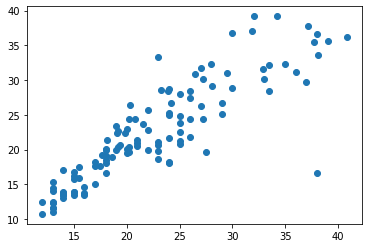

In [39]:
plt.scatter(Y_test,prediction)
plt.show()

In [40]:
test_prediction=model.predict(X_test_std).flatten()
test_prediction

array([13.86622  , 18.170639 , 20.89658  , 32.180847 , 19.105402 ,
       16.693014 , 32.29665  , 19.999376 , 20.646706 , 25.217293 ,
       24.392801 , 24.848866 , 30.197208 , 39.185986 , 22.86076  ,
       24.460575 , 13.518581 , 21.80251  , 11.545165 , 15.317729 ,
       28.726658 , 20.85072  , 18.452887 , 13.713975 , 31.056576 ,
       29.775257 , 19.662575 , 12.982033 , 22.437517 , 13.776445 ,
       33.607693 , 36.241623 , 29.137505 , 28.47256  , 32.293713 ,
       21.738876 , 19.623898 , 17.476078 , 12.270117 , 30.921698 ,
       31.775135 , 21.12939  , 14.6708975, 11.073584 , 12.454436 ,
       25.664906 , 26.742931 , 15.920957 , 14.112022 , 18.940655 ,
       28.532177 , 17.611847 , 31.155079 , 35.45546  , 28.413109 ,
       21.402885 , 10.747913 , 28.882395 , 18.707443 , 36.763233 ,
       16.602695 , 14.541815 , 27.469612 , 23.693245 , 20.344341 ,
       16.728682 , 15.107651 , 33.296383 , 26.318134 , 19.874187 ,
       17.069134 , 19.970676 , 24.401508 , 24.934118 , 21.3541

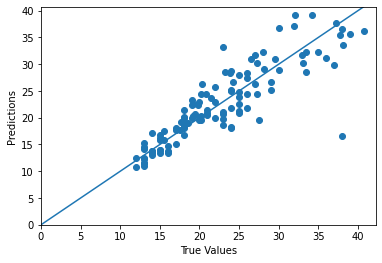

In [41]:

plt.scatter(Y_test,test_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

In [42]:
# predicting on a single value


In [43]:
list1=[[8,350,165,3693,11.5,70,1]]
list1=sc.transform(list1)
list1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.55037035,  1.57170955,  1.60237625,  0.89644554, -1.47975214,
        -1.67028383, -0.7593761 ]])

In [44]:
prediction2=model.predict(list1)

In [45]:
prediction2

array([[14.661097]], dtype=float32)

In [46]:
float(prediction2)

14.661096572875977

In [47]:
int(prediction2)

14

In [48]:
list2=[[8,318,150,3436,11,70,1]]
list2=sc.transform(list2)
list2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.55037035,  1.26241901,  1.21690558,  0.5923108 , -1.65551601,
        -1.67028383, -0.7593761 ]])

In [49]:
prediction3=model.predict(list2)

In [50]:
prediction3

array([[17.431017]], dtype=float32)

In [51]:
float(prediction3)

17.43101692199707

In [52]:
int(prediction3)

17